# Automatic Ticket Assignment

# EDA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
incident = pd.read_excel('input_data.xlsx')

In [3]:
incident.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


In [4]:
incident.shape

(8500, 4)

In [5]:
incident.describe().transpose()

,count,unique,top,freq
Short description,8492,7481,password reset,38
Description,8499,7817,the,56
Caller,8500,2950,bpctwhsn kzqsbmtp,810
Assignment group,8500,74,GRP_0,3976


In [6]:
incident.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


**Inferece:-**

- We have total 8500 records with 4 columns
- Assignement group being the target column 
- From **describe** & **info** output we are able to indentify we null values in **Short description** & **Description** column

In [7]:
incident.isnull().sum()

Short description    8
Description          1
Caller               0
Assignment group     0
dtype: int64

In [8]:
incident[incident['Short description'].isnull()]

,Short description,Description,Caller,Assignment group
2604,NaN,_x000D_\n_x000D_\nreceived from: ohdrnswl.rezu...,ohdrnswl rezuibdt,GRP_34
3383,NaN,_x000D_\n-connected to the user system using t...,qftpazns fxpnytmk,GRP_0
3906,NaN,-user unable tologin to vpn._x000D_\n-connect...,awpcmsey ctdiuqwe,GRP_0
3910,NaN,-user unable tologin to vpn._x000D_\n-connect...,rhwsmefo tvphyura,GRP_0
3915,NaN,-user unable tologin to vpn._x000D_\n-connect...,hxripljo efzounig,GRP_0
3921,NaN,-user unable tologin to vpn._x000D_\n-connect...,cziadygo veiosxby,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,wvqgbdhm fwchqjor,GRP_0
4341,NaN,_x000D_\n_x000D_\nreceived from: eqmuniov.ehxk...,eqmuniov ehxkcbgj,GRP_0


In [9]:
incident[incident['Description'].isnull()]

,Short description,Description,Caller,Assignment group
4395,i am locked out of skype,NaN,viyglzfo ajtfzpkb,GRP_0


In [10]:
incident_details = incident.copy()

**We have 9 null rows, considering the size of the dataset droping the null values**

In [11]:
incident_details.dropna(inplace=True)

In [12]:
incident_details.isnull().sum()

Short description    0
Description          0
Caller               0
Assignment group     0
dtype: int64

**EDA - Target Column**

In [13]:
inc_ass_count = incident_details['Assignment group'].value_counts().reset_index()
inc_ass_count

,index,Assignment group
0,GRP_0,3968
1,GRP_8,661
2,GRP_24,289
3,GRP_12,257
4,GRP_9,252
...,...,...
69,GRP_67,1
70,GRP_73,1
71,GRP_70,1
72,GRP_61,1


**There are 74 unique records, display top and end 20 results**

In [14]:
incident_details['Assignment group'].value_counts().nlargest(20)

GRP_0     3968
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
Name: Assignment group, dtype: int64

- Top 20 assignment group contributes close to 7000 records
- In which, GRP_0 contributes close to 4000 records
- Dataset is highly imbalanced

In [15]:
incident_details['Assignment group'].value_counts().nsmallest(20)

GRP_35    1
GRP_67    1
GRP_73    1
GRP_70    1
GRP_61    1
GRP_64    1
GRP_72    2
GRP_69    2
GRP_57    2
GRP_54    2
GRP_71    2
GRP_63    3
GRP_38    3
GRP_58    3
GRP_68    3
GRP_56    3
GRP_66    4
GRP_32    4
GRP_43    5
GRP_46    6
Name: Assignment group, dtype: int64

In [16]:
inc_ana = incident_details['Assignment group'].value_counts().reset_index()
assignment_distribution = pd.DataFrame(columns=['Category','Ticket Count'])

category1 = {'Category':'1-25 ticket','Ticket Count': len(inc_ana[(inc_ana['Assignment group'] < 25)])}
category2 = {'Category':' 26-50 ticket','Ticket Count':len(inc_ana[(inc_ana['Assignment group'] > 26) & (inc_ana['Assignment group'] < 50)])}
category3 = {'Category':' 51-100 ticket','Ticket Count':len(inc_ana[(inc_ana['Assignment group'] > 50) & (inc_ana['Assignment group'] < 100)])}
category4 = {'Category':' >100 ticket', 'Ticket Count':len(inc_ana[(inc_ana['Assignment group'] > 100)])}

assignment_distribution = assignment_distribution.append([category1, category2, category3, category4], ignore_index=True)

assignment_distribution


,Category,Ticket Count
0,1-25 ticket,34
1,26-50 ticket,13
2,51-100 ticket,8
3,>100 ticket,15


**Visualisation - Target Column**

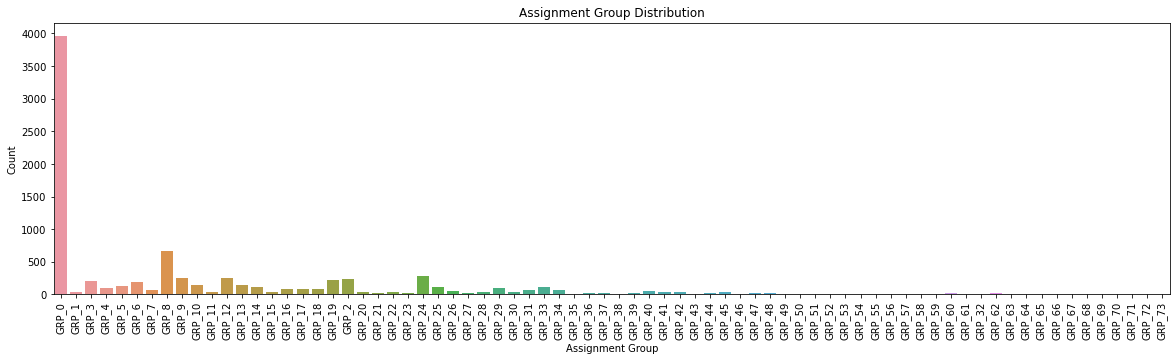

In [17]:
plt.subplots(figsize=(20,5))
sns.countplot(x='Assignment group', data=incident_details)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Assignment Group Distribution')
plt.show();

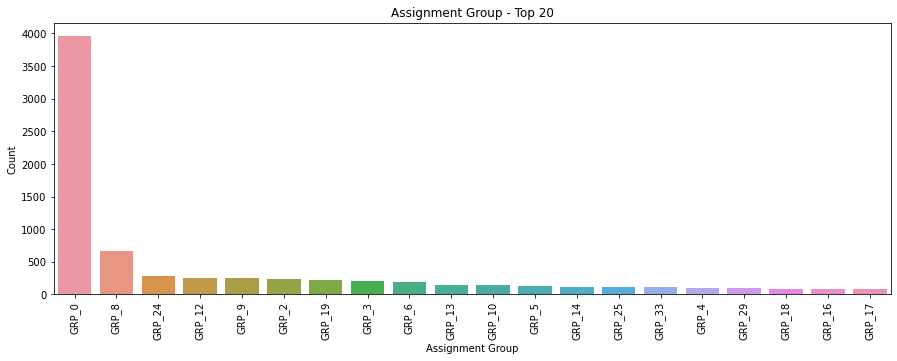

In [18]:
top_20 = incident_details['Assignment group'].value_counts().nlargest(20).reset_index()
plt.subplots(figsize=(15,5))
sns.barplot(x='index', y='Assignment group', data=top_20)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Assignment Group - Top 20')
plt.show();

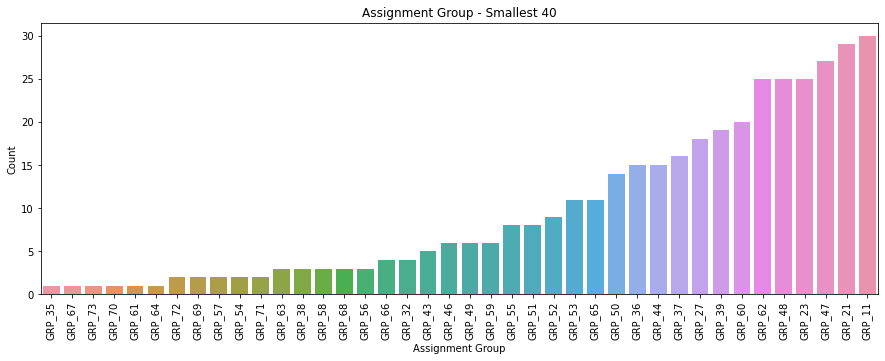

In [19]:
smallest_40 = incident_details['Assignment group'].value_counts().nsmallest(40).reset_index()
plt.subplots(figsize=(15,5))
sns.barplot(x='index', y='Assignment group', data=smallest_40)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Assignment Group - Smallest 40')
plt.show();

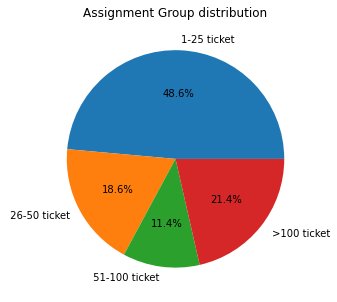

In [20]:
plt.subplots(figsize=(10,5))
plt.pie(assignment_distribution['Ticket Count'], labels=assignment_distribution['Category'], autopct='%1.1f%%')
plt.title('Assignment Group distribution')
plt.show();

In [21]:
inc_ass_25 = inc_ass_count.loc[inc_ass_count['Assignment group'] < 99, 'index'].tolist()
inc_ass_25

['GRP_29',
 'GRP_18',
 'GRP_16',
 'GRP_17',
 'GRP_31',
 'GRP_7',
 'GRP_34',
 'GRP_26',
 'GRP_40',
 'GRP_28',
 'GRP_41',
 'GRP_15',
 'GRP_30',
 'GRP_42',
 'GRP_20',
 'GRP_45',
 'GRP_1',
 'GRP_22',
 'GRP_11',
 'GRP_21',
 'GRP_47',
 'GRP_62',
 'GRP_48',
 'GRP_23',
 'GRP_60',
 'GRP_39',
 'GRP_27',
 'GRP_37',
 'GRP_36',
 'GRP_44',
 'GRP_50',
 'GRP_53',
 'GRP_65',
 'GRP_52',
 'GRP_55',
 'GRP_51',
 'GRP_46',
 'GRP_49',
 'GRP_59',
 'GRP_43',
 'GRP_66',
 'GRP_32',
 'GRP_63',
 'GRP_38',
 'GRP_58',
 'GRP_68',
 'GRP_56',
 'GRP_72',
 'GRP_69',
 'GRP_57',
 'GRP_54',
 'GRP_71',
 'GRP_35',
 'GRP_67',
 'GRP_73',
 'GRP_70',
 'GRP_61',
 'GRP_64']

In [22]:
incident_details.loc[incident_details['Assignment group'].isin(inc_ass_25), 'Assignment group'] = 'GRP_76'

In [23]:
incident_details['Assignment group'].unique()

array(['GRP_0', 'GRP_76', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_8',
       'GRP_9', 'GRP_10', 'GRP_12', 'GRP_13', 'GRP_14', 'GRP_19', 'GRP_2',
       'GRP_24', 'GRP_25', 'GRP_33'], dtype=object)

In [24]:
incident_details['Assignment group'].value_counts().nlargest(20)

GRP_0     3968
GRP_76    1369
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
Name: Assignment group, dtype: int64

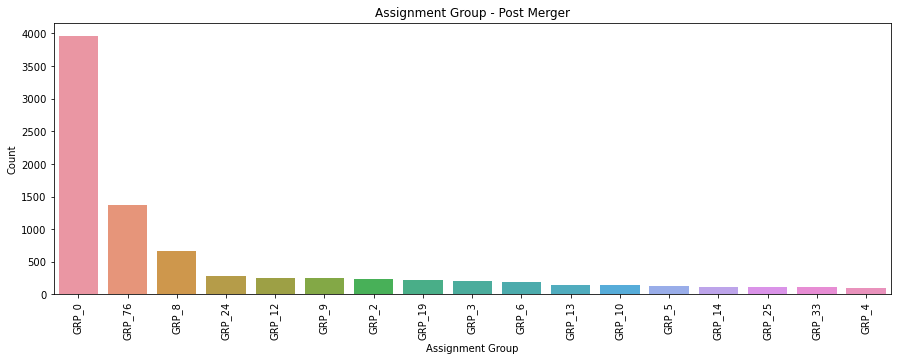

In [25]:
rest = incident_details['Assignment group'].value_counts().reset_index()
plt.subplots(figsize=(15,5))
sns.barplot(x='index', y='Assignment group', data=rest)
plt.xlabel('Assignment Group') 
plt.ylabel('Count') 
plt.xticks(rotation=90)
plt.title('Assignment Group - Post Merger')
plt.show();

In [26]:
incident_txt_prep = incident_details.copy()

In [27]:
incident_txt_prep['Combined Description'] = incident_txt_prep['Short description'] + ' '  + incident_txt_prep['Description']
incident_txt_prep.head(10)

,Short description,Description,Caller,Assignment group,Combined Description
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0,login issue -verified user details.(employee# ...
1,outlook,_x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...,hmjdrvpb komuaywn,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,cant log in to vpn,_x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...,eylqgodm ybqkwiam,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0,unable to access hr_tool page unable to access...
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0,skype error skype error
5,unable to log in to engineering tool and skype,unable to log in to engineering tool and skype,eflahbxn ltdgrvkz,GRP_0,unable to log in to engineering tool and skype...
6,event: critical:HostName_221.company.com the v...,event: critical:HostName_221.company.com the v...,jyoqwxhz clhxsoqy,GRP_76,event: critical:HostName_221.company.com the v...
7,ticket_no1550391- employment status - new non-...,ticket_no1550391- employment status - new non-...,eqzibjhw ymebpoih,GRP_0,ticket_no1550391- employment status - new non-...
8,unable to disable add ins on outlook,unable to disable add ins on outlook,mdbegvct dbvichlg,GRP_0,unable to disable add ins on outlook unable to...
9,ticket update on inplant_874773,ticket update on inplant_874773,fumkcsji sarmtlhy,GRP_0,ticket update on inplant_874773 ticket update ...


In [28]:
incident_txt_prep.drop(columns=['Short description', 'Description', 'Caller'], inplace=True)
incident_txt_prep.head()

,Assignment group,Combined Description
0,GRP_0,login issue -verified user details.(employee# ...
1,GRP_0,outlook _x000D_\n_x000D_\nreceived from: hmjdr...
2,GRP_0,cant log in to vpn _x000D_\n_x000D_\nreceived ...
3,GRP_0,unable to access hr_tool page unable to access...
4,GRP_0,skype error skype error


**Text Preprocessing**

In [29]:
from langdetect import detect

In [30]:
def lang_det(input_df):
    try:
        return detect(input_df)
    except:
        return 'no lang'

In [31]:
incident_txt_prep['language'] = incident_txt_prep['Combined Description'].apply(lang_det)

In [32]:
incident_txt_prep['language'].value_counts()

en    7071
de     377
af     279
fr     128
it     123
sv      78
no      77
da      69
nl      68
ca      52
es      49
pl      27
pt      24
ro      10
cy       9
tl       9
sq       8
sl       5
tr       5
et       4
hr       4
id       4
fi       4
lt       2
cs       2
sk       2
so       1
Name: language, dtype: int64

In [33]:
from langdetect import PROFILES_DIRECTORY

In [34]:
PROFILES_DIRECTORY

'D:\\Anaconda3\\lib\\site-packages\\langdetect\\profiles'

In [ ]:
from polyglot